### Sequential API, Functional API

#### Sequential API

- 간단한 모델을 구현하기에 적합하며 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단하다.
- 단일 입력 및 출력만 있으므로 레이어를 공유하거나 여러 입력 또는 출력을 가질 수 있는 모델을 생성할 수 없다.

#### Functional API

- Functional API는 Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있다.
- 여러 개의 입력 및 출력을 가진 모델을 구현하거나 층 간의 연결 및 연산을 수행하는 모델 구현 시 사용한다.

#### 성능 평가

<img src="./images/validation.png" width="700" style="margin-left: 0">

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [2]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

# 전부 Dense Layer라고 부른다.
# 학습할 데이터가 많으면 neuron의 개수를 더 많이 지정(예: 64, 128, 256 등)하거나
# 은닉층 수를 더 늘리면 된다.
# 학습할 데이터가 적으면 neuron의 개수 또는 은닉층 수를 줄이는 것이 좋다.
model = Sequential([
    # 전체 28 * 28 (784) 개의 feature로 flatten 진행
    # 첫 번째 Input Layer
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    
    # 두 번째 Hidden Layer
    Dense(64, activation='relu'),
    
    # 세 번째 Hidden Layer
    Dense(128, activation='relu'),
    
    # 마지막 Output Layer
    Dense(10, activation='softmax')
])

# 파라미터 수 = (입력 뉴런 수 * 출력 뉴런 수) + 출력 뉴런 수
# 이 파라미터 수에는 편향(bias) 파라미터도 포함되어야 하고
# 편향은 각 출력 뉴런에 더해지는 추가적인 파라미터 수이다.
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [5]:
from tensorflow.keras.utils import to_categorical

train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [6]:
history = model.fit(x=train_images, y=train_oh_targets, batch_size=64, epochs=20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7531 - loss: 0.7126
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8590 - loss: 0.3864
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8734 - loss: 0.3427
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8830 - loss: 0.3191
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8880 - loss: 0.3056
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8922 - loss: 0.2921
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8987 - loss: 0.2721
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9014 - loss: 0.2645
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9056 - loss: 0.2512
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9069 - loss: 0.2509
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9107 - loss: 0.2368
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [8]:
print(history.history['loss'])
print("=" * 80)
print(history.history['accuracy'])

[0.5281097292900085, 0.38336652517318726, 0.3445913791656494, 0.3196922540664673, 0.3045799732208252, 0.29006749391555786, 0.27438193559646606, 0.2653180956840515, 0.25771552324295044, 0.24992680549621582, 0.24249988794326782, 0.23327849805355072, 0.22652354836463928, 0.22105634212493896, 0.21401657164096832, 0.20730160176753998, 0.2047109305858612, 0.19682957231998444, 0.18793195486068726, 0.18627803027629852]
[0.8132833242416382, 0.8605999946594238, 0.8736500144004822, 0.8828999996185303, 0.8878166675567627, 0.892799973487854, 0.8978833556175232, 0.9011833071708679, 0.9039166569709778, 0.9064499735832214, 0.9087499976158142, 0.9114500284194946, 0.9153666496276855, 0.9175833463668823, 0.9192333221435547, 0.9227166771888733, 0.9231833219528198, 0.925516664981842, 0.9291333556175232, 0.9296166896820068]


In [13]:
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [14]:
pred_prob = model.predict(np.expand_dims(test_images[0], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[7.2100704e-08 2.6747523e-06 1.4236513e-09 6.3988537e-08 1.4803129e-08
  2.9958198e-03 5.5184762e-10 4.8969327e-03 2.5835110e-09 9.9210429e-01]]


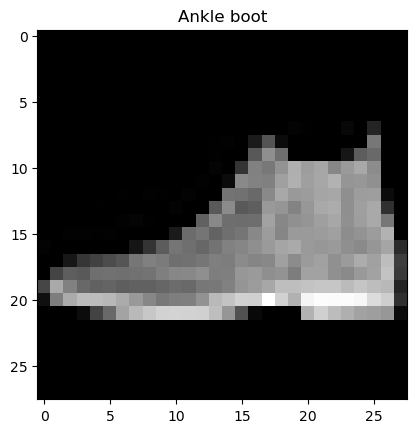

In [18]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', '', 'Ankle boot']

plt.imshow(test_images[0], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [19]:
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8853 - loss: 0.3500


[0.35533830523490906, 0.8855000138282776]

### Validation

In [20]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [21]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [23]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
history = model.fit(x=train_images,
                    y=train_oh_targets, 
                    validation_data=(validation_images, validation_oh_targets), 
                    batch_size=32,
                    epochs=20,
                    verbose=2
                   )

Epoch 1/20
1500/1500 - 3s - 2ms/step - acc: 0.8136 - loss: 0.5230 - val_acc: 0.8506 - val_loss: 0.4049
Epoch 2/20
1500/1500 - 2s - 1ms/step - acc: 0.8597 - loss: 0.3848 - val_acc: 0.8671 - val_loss: 0.3640
Epoch 3/20
1500/1500 - 2s - 1ms/step - acc: 0.8720 - loss: 0.3456 - val_acc: 0.8590 - val_loss: 0.3821
Epoch 4/20
1500/1500 - 2s - 1ms/step - acc: 0.8808 - loss: 0.3239 - val_acc: 0.8669 - val_loss: 0.3613
Epoch 5/20
1500/1500 - 2s - 1ms/step - acc: 0.8851 - loss: 0.3073 - val_acc: 0.8725 - val_loss: 0.3418
Epoch 6/20
1500/1500 - 2s - 1ms/step - acc: 0.8908 - loss: 0.2940 - val_acc: 0.8673 - val_loss: 0.3595
Epoch 7/20
1500/1500 - 2s - 1ms/step - acc: 0.8962 - loss: 0.2781 - val_acc: 0.8859 - val_loss: 0.3229
Epoch 8/20
1500/1500 - 2s - 1ms/step - acc: 0.9009 - loss: 0.2647 - val_acc: 0.8901 - val_loss: 0.3111
Epoch 9/20
1500/1500 - 2s - 1ms/step - acc: 0.9030 - loss: 0.2573 - val_acc: 0.8846 - val_loss: 0.3240
Epoch 10/20
1500/1500 - 2s - 1ms/step - acc: 0.9077 - loss: 0.2485 - val_

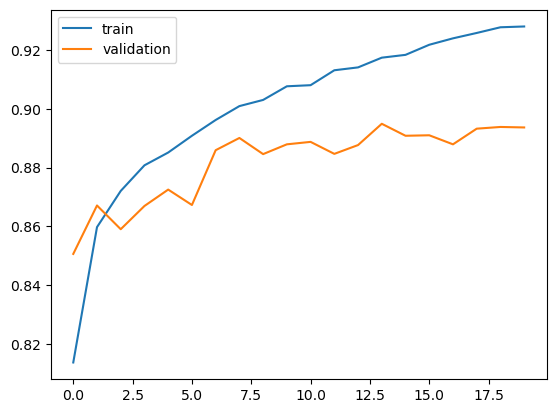

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [27]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - acc: 0.8780 - loss: 0.3938


[0.4014677107334137, 0.8797000050544739]

### Functional API

In [28]:
class Test:
    def __call__(self, data):
        return data + 10

print(Test()(20))

30


In [29]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

In [32]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np



def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [33]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [34]:
model = create_model()
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [36]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7344 - loss: 0.7729 - val_acc: 0.8466 - val_loss: 0.4133
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8528 - loss: 0.4058 - val_acc: 0.8549 - val_loss: 0.3903
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8664 - loss: 0.3658 - val_acc: 0.8709 - val_loss: 0.3548
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8788 - loss: 0.3323 - val_acc: 0.8643 - val_loss: 0.3583
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8864 - loss: 0.3101 - val_acc: 0.8660 - val_loss: 0.3562
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8889 - loss: 0.3011 - val_acc: 0.8748 - val_loss: 0.3362
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8927 - loss: 0.2865 - val_acc: 0.8777 - val_loss: 0.3304
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8984 - loss: 0.2756 - val_acc: 0.8811 - val_loss: 0.3252
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - ac

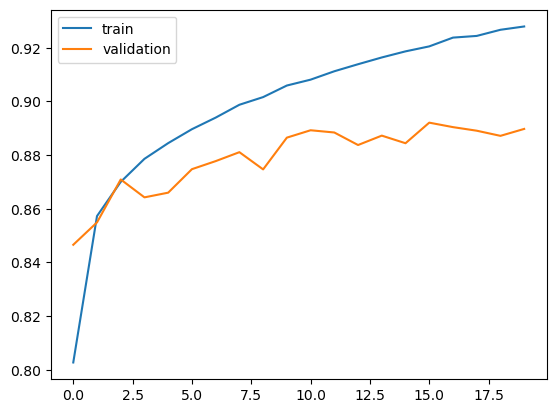

In [37]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)